# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 3: Exploratory Data Analysis

## Learning Objectives

At the end of the experiment, you will be able to

- understand how to visualize a time-series dataset (Australian Anti-diabetic drug sales time series dataset)
- understand how to find seasonality and trend and detect patterns in a time-series
- know why and how to deseasonalize and detrend a time series
- understand what is autocorrelation and partial autocorrelation function
- understand the significance of lag plots and how to plot them
- know why we smoothen a time-series and how we will do in a dataset
- understand the Granger Causality test to know if one time series helps forecast another



## Information

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis, and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.


### Dataset Description

**Name:**

Monthly anti-diabetic drug sales in Australia from 1991 to 2008.

**Description:**

Total monthly scripts for pharmaceutical products falling under ATC code A10, as recorded by the Australian Health Insurance Commission. There are 204 entries, from 1991-07-01 to 2008-06-01 (Monthly sales values).

**Variables:**

Monthly time series of class ts.

### Setup Steps:

In [5]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216628" #@param {type:"string"}

In [6]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9019402057" #@param {type:"string"}

In [7]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M6_AST_03_Exploratory_Data_Analysis_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import signal
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import grangercausalitytests

In [12]:
# Read dataset
df = pd.read_csv('a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [13]:
# Read dataset with 'date' as index
df = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### Visualizing a time series

Let’s visualise the series using matplotlib.

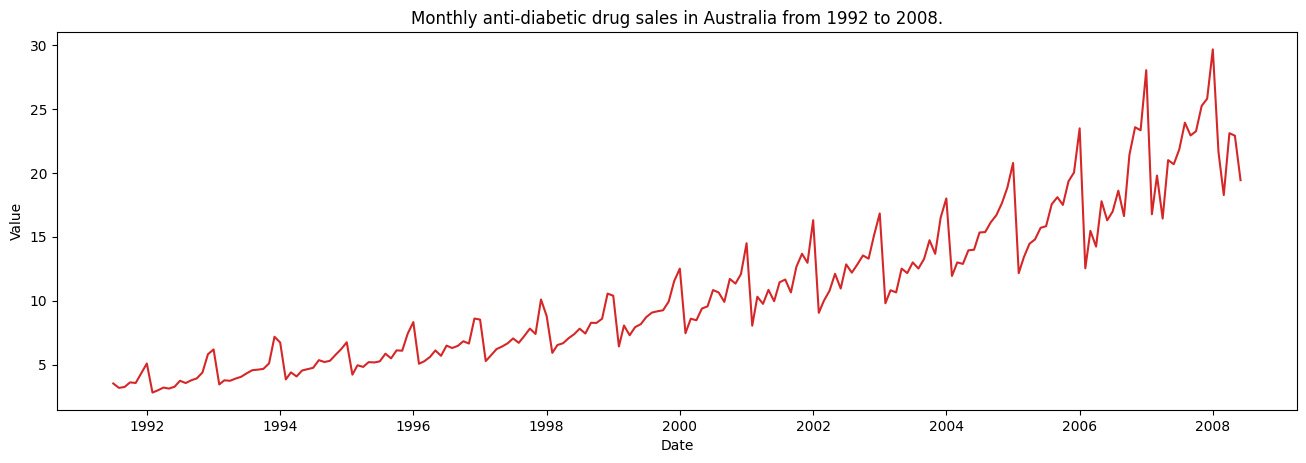

In [14]:
# Define function to plot the time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

There is a clear and increasing trend. There is also a strong seasonal pattern that increases in size as the level of the series increases. The sudden drop at the start of each year is caused by a government subsidization scheme that makes it cost-effective for patients to stockpile drugs at the end of the calendar year. Any forecasts of this series would need to capture the seasonal pattern and the fact that the trend is changing slowly.

### Seasonal Plot of a Time Series

In [15]:
# Reset the index
df.reset_index(inplace=True)

In [16]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prepare Colors
np.random.seed(100)


mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [17]:
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

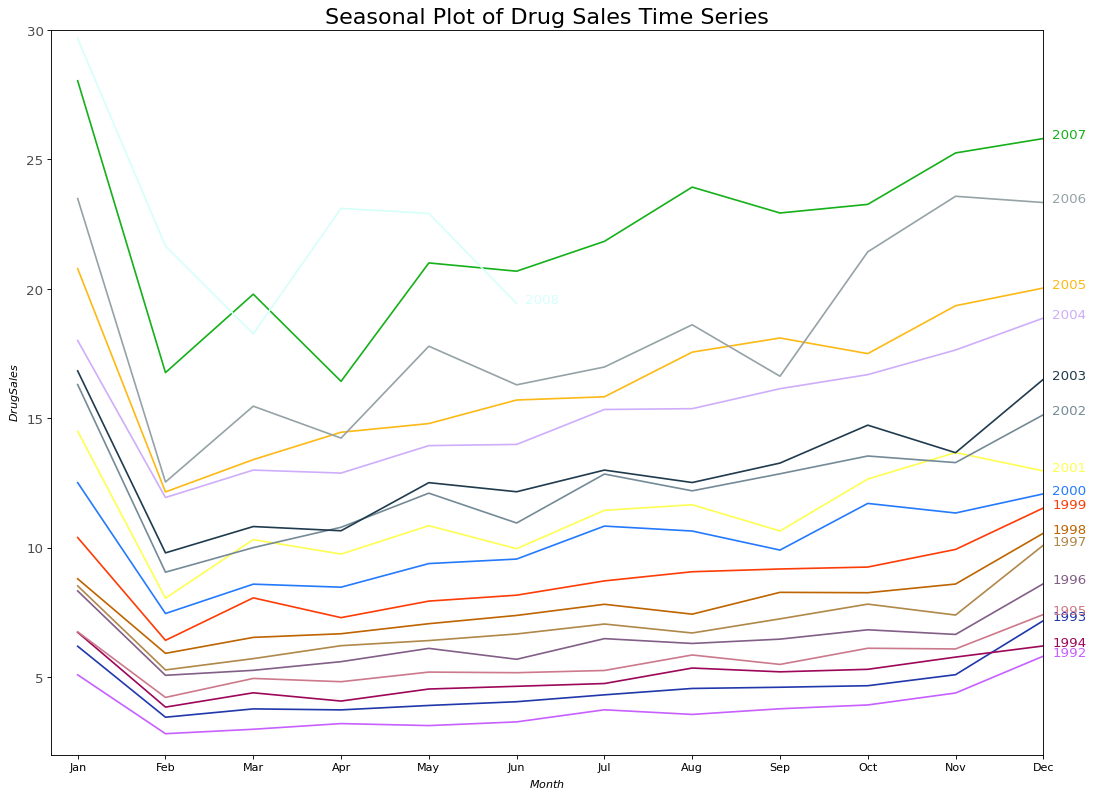

In [18]:
# Visualize seasonal variaton in drug sales
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

There is a large jump in sales in January each year. The graph also shows that there was an unusually small number of sales in March 2008 (most other years show an increase between February and March). The small number of sales in June 2008 is probably due to incomplete counting of sales at the time the data were collected.

However, as years progress, the drug sales increase overall. We can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, we can do a month-wise boxplot to visualize the monthly distributions.

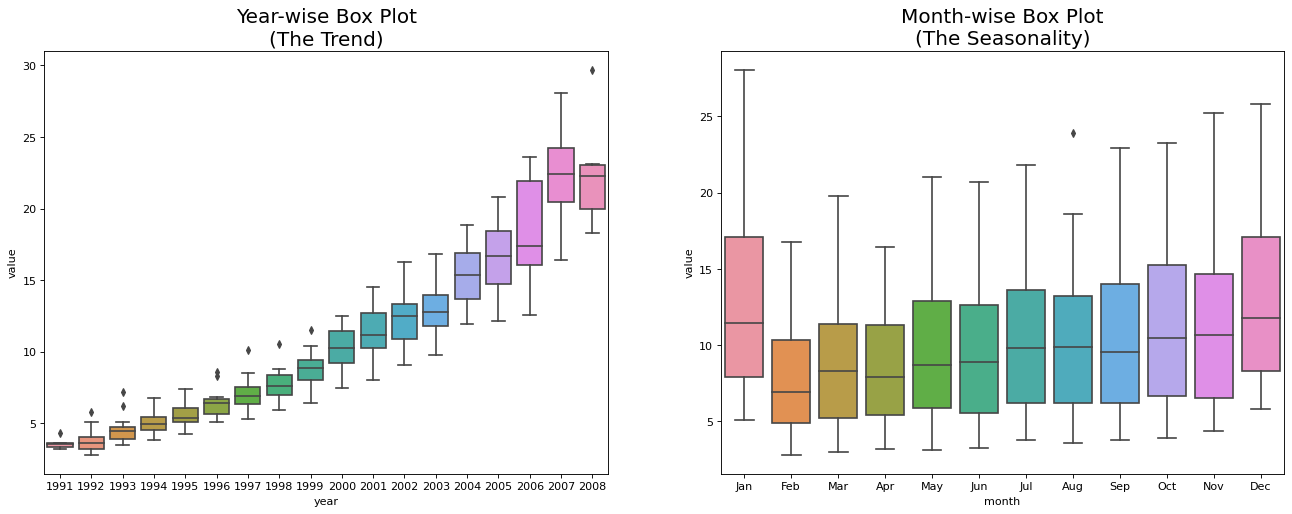

In [19]:
# Visualize the yearly and monthly drug sales using box plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly have higher drug sales, which can be attributed to the holiday discounts season.

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

###  Patterns in a time series

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

**Trend:**

A trend exists when there is a long-term increase or decrease in the data.
It does not have to be linear. Sometimes we will refer to a trend as “changing direction” when it might go from an increasing trend to a decreasing trend.
There is a trend in the antidiabetic drug sales data.

**Seasonality:**

A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.
Seasonality is always of a fixed and known frequency.
The monthly sales of antidiabetic drugs above show seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

**Residuals:**

When you remove the trend, seasonality, and other observable patterns from the data, white noise is left and this is termed as residuals.

A time series may be imagined as a combination of the trend, seasonality and the error/residual terms.

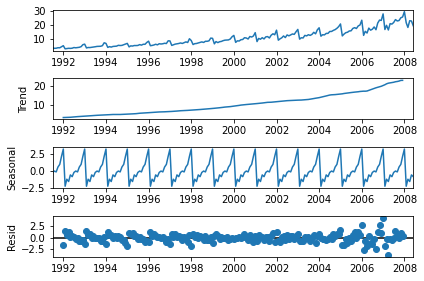

In [20]:
# Setting index back to date
df = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')

# Applying seasonal decompose
result = seasonal_decompose(df, model='additive')

# Plotting trend, seasonality and both trend and seasonality in drug sales data
result.plot()
plt.show()

Another aspect to consider is the cyclic behavior. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to differentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar-based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

### Additive and Multiplicative Time-Series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

$\text{Additive time series:}$

$\hspace{0.5cm}\text{=> Value = Base Level + Trend + Seasonality + Error}$

$\text{Multiplicative Time Series:}$

$\hspace{0.5cm}\text{=> Value = Base Level x Trend x Seasonality x Error}$


###  Detrend a time series

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms $(x^2)$ in the model.

2. Subtract the trend component obtained from time series decomposition we saw earlier.

3. Subtract the mean

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Let’s implement the first two methods.

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

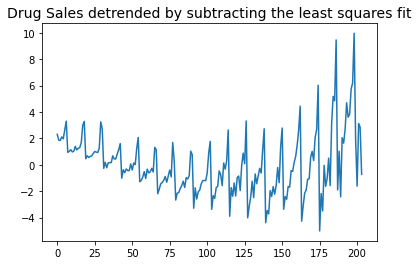

In [ ]:
# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=14)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

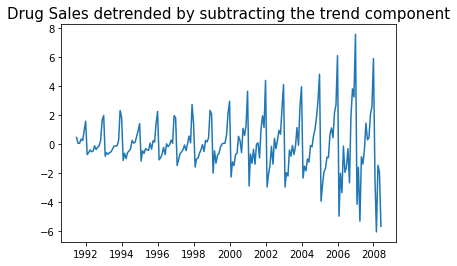

In [ ]:
# Decomposing time-series first
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
# Detrending the time-series by trend component
detrended = df.value.values - result_mul.trend

# Plotting the detrended time series
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=15)

### Deseasonalize a time series

There are multiple approaches to deseasonalize a time series as well. Below are a few:

1. Take a moving average with length as the seasonal window. This will smoothen the series in the process.

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from STL decomposition

If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.

In [ ]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize the time series
deseasonalized = df.value.values / result_mul.seasonal

[]

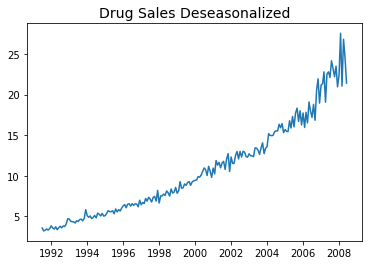

In [ ]:
# Visualize deseasonalize tiem series
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=14)
plt.plot()

### Autocorrelation and Partial Autocorrelation Functions

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

Running the below code, two 2D plots showing the lag value along the x-axis and the correlation (for both acf and pacf) on the y-axis between -1 and 1.

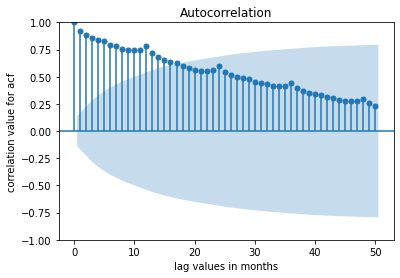

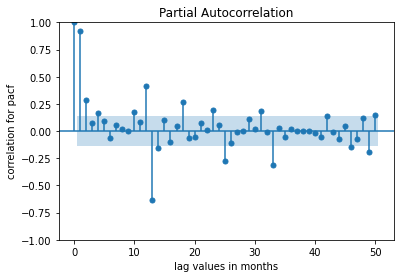

In [ ]:
# Draw ACF Plot
acf_50 = plot_acf(df['value'], lags=50)
plt.xlabel('lag values in months')
plt.ylabel('correlation value for acf')
acf_50.show()

# Draw PACF Plot
pacf_50 = plot_pacf(df['value'], lags=50)
plt.xlabel('lag values in months')
plt.ylabel('correlation for pacf')
pacf_50.show()

Confidence intervals are drawn as a `blue part`. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation.

**Intuition of ACF plot**

As per the above ACF plot, we have a good correlation up to 14 to 15 lag, this is the lag after which the plot cuts the upper confidence interval.

**Intuition of PACF plot**

If we see the PACF plot there are many instances where correlation is the above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is a linear combination of residual and its lagged values. Hence we can get a good correlation for near as well as past lags.






<font color='blue'>**Discussion 1:** So how to compute partial autocorrelation? Here we will discuss the mathematics behind it.</font>

### Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In the below example on Sunspots area time series, the plots get more and more scattered as the n_lag increases.

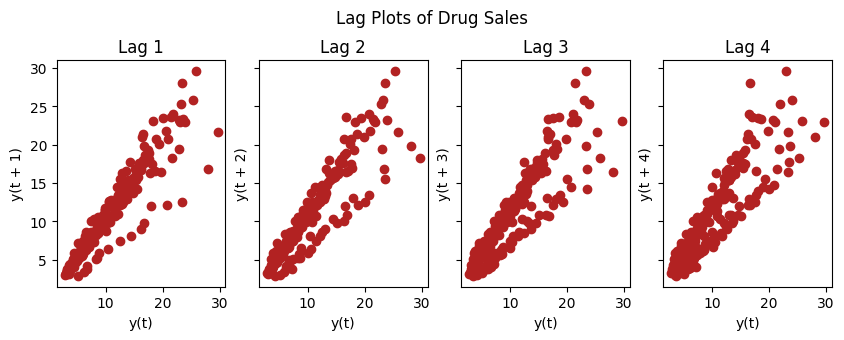

In [ ]:
# Visualize lag plots
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

### How to smoothen a time series

<font color='blue'>**Discussion 2:** Firstly, let us discuss why do we smoothen our time series?<font>

So how to smoothen a series? Let’s discuss the following methods:

1. Take a moving average
2. Do a LOESS smoothing (Localized Regression)
3. Do a LOWESS smoothing (Locally Weighted Regression)

Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

LOESS, short for ‘Localized regression’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

Text(0.5, 0.95, 'How to Smoothen a Time Series')

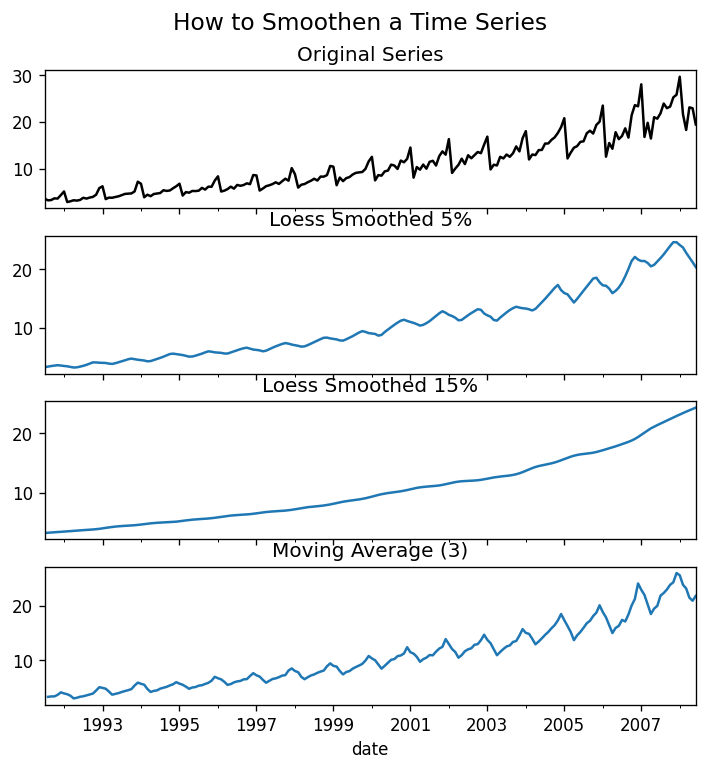

In [ ]:
# 1. Moving Average
df_ma = df.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.05)[:, 1], index=df.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df.value, np.arange(len(df.value)), frac=0.15)[:, 1], index=df.index, columns=['value'])

# Visualize Moving average and Loess smoothing
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)

### Granger Causality test to know if One Time Series helps Forecast Another

Granger causality test is used to determine if one time series will be useful to forecast another.

**How the does Granger causality test work?**

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y and the previous values of X should outperform the forecast of Y based on previous values of Y alone.

So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the statsmodel package.

It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

The second argument maxlag says till how many lags of Y should be included in the test.

In [ ]:
# Perform Granger Causality test
df.reset_index(inplace=True)
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


In the above case, the P-Values are Zero for all tests. So the ‘month’ indeed can be used to forecast the Drug Sales.

We started from the very basics and understood the various characteristics of a time series. Once the analysis is done the next step is to begin forecasting.

### Please answer the questions below to complete the experiment:




In [21]:
#@title For measuring cycles in a time series, the residual method is used. It consists of? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Removing the influences of the trend, seasonal variations and other observable patterns" #@param ["", "Removing only the trend from the series", "Removing only the seasonal variation from the series", "Removing the influences of the trend, seasonal variations and other observable patterns"]

In [22]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [23]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [24]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["","Yes", "No"]


In [25]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Not Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [26]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8455
Date of submission:  05 Mar 2023
Time of submission:  23:33:15
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
